In [1]:
import f3dasm
import numpy as np

In [2]:
dim = 2
i = 50
r = 1
bounds = np.array([[-1.0, 1.0], [-1.0, 1.0]])
hyperparameters={}

design = f3dasm.make_nd_continuous_design(bounds=bounds, dimensions=dim)

func = f3dasm.functions.Ackley(dimensionality=dim, noise=False, scale_bounds=bounds)
func.offset = np.atleast_2d(np.zeros(func.dimensionality))

data = f3dasm.Data(designspace=design)
optimizer = f3dasm.optimization.DualAnnealing(data=data, hyperparameters=hyperparameters)
sampler = f3dasm.sampling.LatinHypercubeSampling(doe=design)


all_data = f3dasm.run_multiple_realizations(optimizer=optimizer, 
function=func,
sampler=sampler,
iterations=i,
realizations=r
)



In [3]:
func.dfdx(np.array([0.5, 0.8]))

array([[  0.67115438, -63.93762044]])

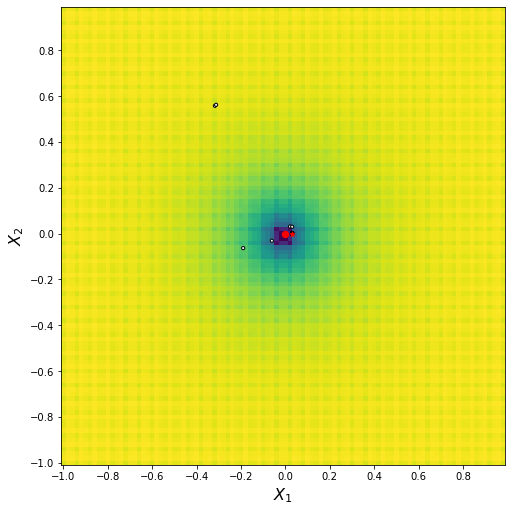

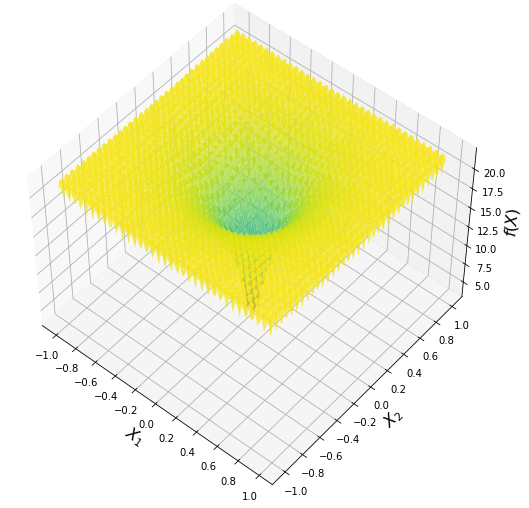

In [4]:
if dim == 2:
    fig, ax = func.plot_data(all_data[0], px=100, domain=bounds)
    ax.scatter(func.get_global_minimum(dim)[0][0],func.get_global_minimum(dim)[0][1], s=40, c='r')
    #ax.scatter(-3.19468541,0.89682456, s=40, c='g')
    func.plot(px=100, domain=bounds)

In [5]:
y = np.array([[0.2,0.1],[0.3,0.4]])
y + np.abs(func.get_global_minimum(2)[1])

array([[0.2, 0.1],
       [0.3, 0.4]])

In [6]:
all_data[0].data['input']

,x0,x1
0,-0.317775,5.578284e-01
1,-0.312456,5.624217e-01
2,-0.190578,-6.310014e-02
3,-0.061394,-3.070051e-02
4,0.020409,3.122497e-02
5,0.030265,3.026492e-02
6,0.030265,3.561565e-03
7,0.029755,-9.167940e-09
8,0.029755,-9.167940e-09
9,0.029755,-9.167940e-09


In [7]:
func.scale_bounds, func.input_domain

(array([[-1.,  1.],
        [-1.,  1.]]),
 array([[-32,  32],
        [-32,  32]]))

In [8]:
import pandas as pd
mean_y = pd.concat([d.get_output_data() for d in all_data], axis=1).mean(axis=1)
std_y = pd.concat([d.get_output_data() for d in all_data], axis=1).std(axis=1)
mean_y

0     19.908813
1     18.912490
2     12.187252
3      5.381864
4      4.586376
5      3.574452
6      2.913972
7      2.579928
8      2.579928
9      2.579928
10     2.579928
11     2.579928
12     2.579928
13     2.579928
14     2.579928
15     2.579928
16     2.579928
17     2.579928
18     2.579928
19     2.579928
20     2.579928
21     2.579928
22     2.579928
23     2.579928
24     2.579928
25     2.579928
26     2.579928
27     2.579928
28     2.579928
29     2.579928
30     2.579928
31     2.579928
32     2.579928
33     2.579928
34     2.579928
35     2.579928
36     2.579928
37     2.579928
38     2.579928
39     2.579928
40     2.579928
41     2.579928
42     2.579928
43     2.579928
44     2.579928
45     2.579928
46     2.579928
47     2.579928
48     2.579928
49     2.579928
50     2.579928
dtype: float64

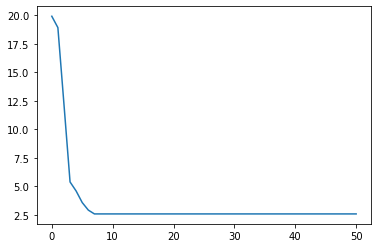

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.figure(), plt.axes()
ax.plot(mean_y)
ax.fill_between(np.arange(len(mean_y)), mean_y-1.96*std_y, mean_y+1.96*std_y, color='b', alpha=.1)
#ax.set_yscale('log')
fig.show()

In [10]:
func.get_global_minimum(2)

(array([0., 0.]), array([[4.4408921e-16]]))

In [11]:
func.descale_input(np.array([0.0,0.0]))
x = np.array([[0.0,0.0]])

AttributeError: 'Ackley' object has no attribute 'descale_input'

In [ ]:
func.input_domain

In [ ]:
(func.input_domain[:, 1] - func.input_domain[:, 0]) * x + func.input_domain[:, 0]

In [ ]:
(x - func.input_domain[:, 0]) / (func.input_domain[:, 1] - func.input_domain[:, 0])

In [ ]:
x

In [ ]:
func.input_domain[:, 0]

In [ ]:
x - func.input_domain[:, 0]

In [ ]:
(func.input_domain[:, 1] - func.input_domain[:, 0])

In [ ]:
o = np.array([[0.9,0.3]])
o

In [ ]:
func.scale_input(func.descale_input(o))

In [ ]:
func.descale_input(func.scale_input(o))
o

In [ ]:
scale_bounds = [-3., 1.]

In [ ]:
o = np.random.uniform(low=scale_bounds[0], high=scale_bounds[1], size=(1, func.dimensionality))
x = o
x

In [ ]:
(func.input_domain[:, 1] - func.input_domain[:, 0])

In [ ]:
(x - func.scale_bounds[:, 0]) / (func.scale_bounds[:, 1] - func.scale_bounds[0])

In [ ]:
func.offset

In [ ]:
func.get_global_minimum(2)[0]

In [ ]:
(func.scale_bounds[:, 1] - func.scale_bounds[0])